In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
dn = pd.read_csv('aanumerical.csv') 
dn.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [3]:
dn.shape

(9134, 8)

In [4]:
dc = pd.read_csv('aacategorical.csv') 
dc.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize


# Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target.

In [5]:
import pandas as pd


data = pd.concat([dn, dc], axis=1)

# Assuming 'target_column' is the name of the target column in your data
X = data.drop('total_claim_amount', axis=1)  # Features
y = data['total_claim_amount']               # Target

# In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [6]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [7]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type
5123,4768.955924,51144,61,28,32,1,9,3,1
7738,2827.559570,0,79,30,25,0,1,2,3
214,2912.892035,81097,74,7,67,0,1,1,4
8580,5138.244998,72264,64,2,66,0,9,3,3
7857,2610.369217,54737,66,3,86,0,1,3,3


# Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num

In [8]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [9]:
pd.DataFrame(numericals_train_standardized).head()

,0,1,2,3,4,5,6,7,8
0,-0.479124,0.451347,-0.939028,1.278496,-0.570400,0.680218,2.504111,0.889242,-0.958248
1,-0.764993,-1.242714,-0.419953,1.476446,-0.820599,-0.416990,-0.828167,-0.423158,1.025861
2,-0.752428,1.443490,-0.564141,-0.799983,0.680592,-0.416990,-0.828167,-1.735557,2.017915
3,-0.424747,1.150912,-0.852516,-1.294859,0.644850,-0.416990,2.504111,0.889242,1.025861
4,-0.796975,0.570359,-0.794841,-1.195884,1.359702,-0.416990,-0.828167,0.889242,1.025861


# Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)

In [10]:
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
categoricals_train.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,sales_channel,vehicle_class,vehicle_size
5123,Washington,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Agent,Two-Door Car,Medsize
7738,Oregon,No,Extended,College,Unemployed,F,Suburban,Single,Special Auto,Branch,Four-Door Car,Medsize
214,Arizona,No,Basic,College,Employed,M,Suburban,Divorced,Personal Auto,Agent,Four-Door Car,Small
8580,California,No,Basic,Bachelor,Employed,F,Urban,Married,Corporate Auto,Web,Four-Door Car,Medsize
7857,Washington,No,Basic,Bachelor,Employed,F,Suburban,Single,Personal Auto,Web,Four-Door Car,Medsize


In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train)
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded = encoder.transform(categoricals_test).toarray()

In [12]:
encoder.categories_

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'High School or Below', 'Post Grad'],
       dtype=object),
 array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Rural', 'Suburban', 'Urban'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object),
 array(['Four-Door Car', 'Luxury', 'SUV', 'Sports Car', 'Two-Door Car'],
       dtype=object),
 array(['Large', 'Medsize', 'Small'], dtype=object)]

In [13]:
categoricals_test_encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

# Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [14]:
X_train = np.concatenate((numericals_train_standardized,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_standardized,categoricals_test_encoded),axis=1)

In [15]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.559570,1.227791,0.358659,-1.393834,0.037225,-0.416990,-0.828167,0.889242,0.033806,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.369367,-0.473656,-0.650653,-0.799983,-1.356738,-0.416990,0.421437,-0.423158,2.017915,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.620606,1.900791,0.012609,-1.195884,-0.355944,-0.416990,-0.828167,0.889242,0.033806,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.015898,1.312852,0.156797,-1.195884,-0.749113,0.680218,0.837972,0.889242,-0.958248,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.013410,-0.455405,-0.708328,0.288744,-1.213768,-0.416990,-0.411632,-0.423158,-0.958248,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.098063,0.714810,0.474009,1.575422,0.895048,-0.416990,0.004902,0.889242,0.033806,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1823,-0.058783,1.072608,-0.852516,0.783620,0.716335,-0.416990,-0.411632,-0.423158,2.017915,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1824,-0.495109,1.732889,0.647034,0.882595,-1.320996,-0.416990,-0.828167,0.889242,-0.958248,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1825,-0.873696,-1.242714,-0.881353,1.476446,-1.499709,0.680218,-0.828167,-0.423158,-0.958248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Try a simple linear regression with all the data to see whether we are getting good results.

In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error , r2_score

In [17]:
# Applying linear regression model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.7640742237720475

# Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.



In [19]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)
knn_classifier = KNeighborsRegressor(n_neighbors=7,weights='distance', metric='manhattan')
KNN.fit(X_train, y_train)
score = KNN.score(X_test, y_test)
score

0.6140223673161022

In [20]:
def plot_knn_r2_scores(X_train, X_test, y_train, y_test, k_range=(2, 25)):
    scores = []
    for k in range(*k_range):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
        scores
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(*k_range), scores, color='blue', linestyle='dashed',
             marker='o', markerfacecolor='red', markersize=10)

    plt.title('R2-scores vs. K Value')
    plt.gca().invert_yaxis()
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()

# Example usage
# Replace X_train, X_test, y_train, y_test with your actual data
# plot_knn_r2_scores(X_train, X_test, y_train, y_test)


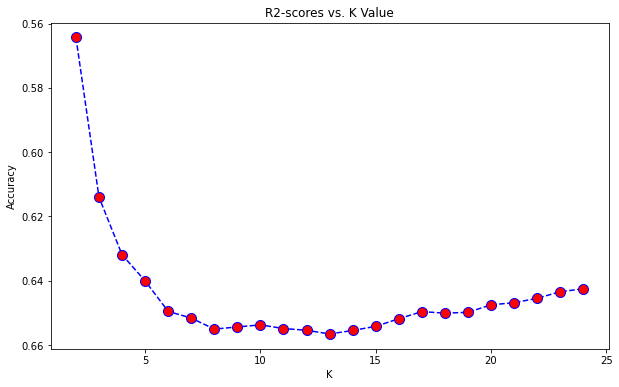

In [21]:
plot_knn_r2_scores(X_train, X_test, y_train, y_test, k_range=(2, 25))

# Use the function to check LinearRegressor and KNeighborsRegressor.

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


def train_and_test_models(models, X_train, y_train, X_test, y_test):
    
    results = {}
    
    for model in models:
        model_name = type(model).__name__
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        from sklearn.metrics import r2_score
        r2_score = r2_score(y_test, lm.predict(X_test))
        
        # Calculate the mean squared error
        mse = mean_squared_error(y_test, y_pred)
        
#         results[model_name] = mse
        results[model_name] = r2_score
    
    return results

# Define your list of models
models_to_try = [linear_model.LinearRegression(), KNeighborsRegressor(n_neighbors=5, metric='euclidean')]

# Call the function to train and test the models
model_results = train_and_test_models(models_to_try, X_train, y_train, X_test, y_test)

# Print the results
for model_name, r2_score in model_results.items():
#     print(f"{model_name}: Mean Squared Error = {mse:.2f}")
    print(f"{model_name}: 'r2_score' = {mse:.2f}")


LinearRegression: 'r2_score' = 0.76
KNeighborsRegressor: 'r2_score' = 0.76


# You can check also the MLPRegressor for this task!



In [25]:
from sklearn.neural_network import MLPRegressor


In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


def train_and_test_models(models, X_train, y_train, X_test, y_test):
    
    results = {}
    
    for model in models:
        model_name = type(model).__name__
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        from sklearn.metrics import r2_score
        r2_score = r2_score(y_test, lm.predict(X_test))
        
#         # Calculate the mean squared error
#         mse = mean_squared_error(y_test, y_pred)
        
#         results[model_name] = mse
        results[model_name] = r2_score
    
    return results

# Define your list of models
models_to_try = [linear_model.LinearRegression(),MLPRegressor, KNeighborsRegressor(n_neighbors=5, metric='euclidean')]

# Call the function to train and test the models
model_results = train_and_test_models(models_to_try, X_train, y_train, X_test, y_test)

# Print the results
for model_name, r2_score in model_results.items():
#     print(f"{model_name}: Mean Squared Error = {mse:.2f}")
     print(f"{model_name}: 'r2_score' = {mse:.2f}")


TypeError: fit() missing 1 required positional argument: 'y'